In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
df = pd.read_csv('../datas/emprego.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
df['area'] = pd.factorize( df['hsc_s'] )[0]
df['sexo'] = pd.factorize( df['gender'] )[0]
df['experiencia'] = pd.factorize( df['workex'] )[0]

In [4]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,area,sexo,experiencia
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,0,0,0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,1,0,1
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,2,0,0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,1,0,0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,0,0,0


In [5]:
x = df[['area', 'sexo', 'experiencia']]
y = df['status']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=18)

In [7]:
from sklearn.tree import DecisionTreeClassifier

arvore = DecisionTreeClassifier()
arvore.fit(X_train,y_train)

DecisionTreeClassifier()

In [8]:
predicao = arvore.predict(X_test)

In [9]:
print(confusion_matrix(y_test,predicao))
print(classification_report(y_test,predicao))

[[ 4 19]
 [ 6 36]]
              precision    recall  f1-score   support

  Not Placed       0.40      0.17      0.24        23
      Placed       0.65      0.86      0.74        42

    accuracy                           0.62        65
   macro avg       0.53      0.52      0.49        65
weighted avg       0.56      0.62      0.57        65



[Text(0.4875, 0.9, 'experiencia <= 0.5\ngini = 0.415\nsamples = 150\nvalue = [44, 106]\nclass = Placed'),
 Text(0.2, 0.7, 'sexo <= 0.5\ngini = 0.477\nsamples = 97\nvalue = [38.0, 59.0]\nclass = Placed'),
 Text(0.34375, 0.8, 'True  '),
 Text(0.1, 0.5, 'area <= 0.5\ngini = 0.456\nsamples = 57\nvalue = [20, 37]\nclass = Placed'),
 Text(0.05, 0.3, 'gini = 0.422\nsamples = 33\nvalue = [10, 23]\nclass = Placed'),
 Text(0.15, 0.3, 'area <= 1.5\ngini = 0.486\nsamples = 24\nvalue = [10, 14]\nclass = Placed'),
 Text(0.1, 0.1, 'gini = 0.491\nsamples = 23\nvalue = [10.0, 13.0]\nclass = Placed'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Placed'),
 Text(0.3, 0.5, 'area <= 0.5\ngini = 0.495\nsamples = 40\nvalue = [18, 22]\nclass = Placed'),
 Text(0.25, 0.3, 'gini = 0.495\nsamples = 20\nvalue = [11, 9]\nclass = Not Placed'),
 Text(0.35, 0.3, 'area <= 1.5\ngini = 0.455\nsamples = 20\nvalue = [7, 13]\nclass = Placed'),
 Text(0.3, 0.1, 'gini = 0.444\nsamples = 18\nvalue = [6, 12]

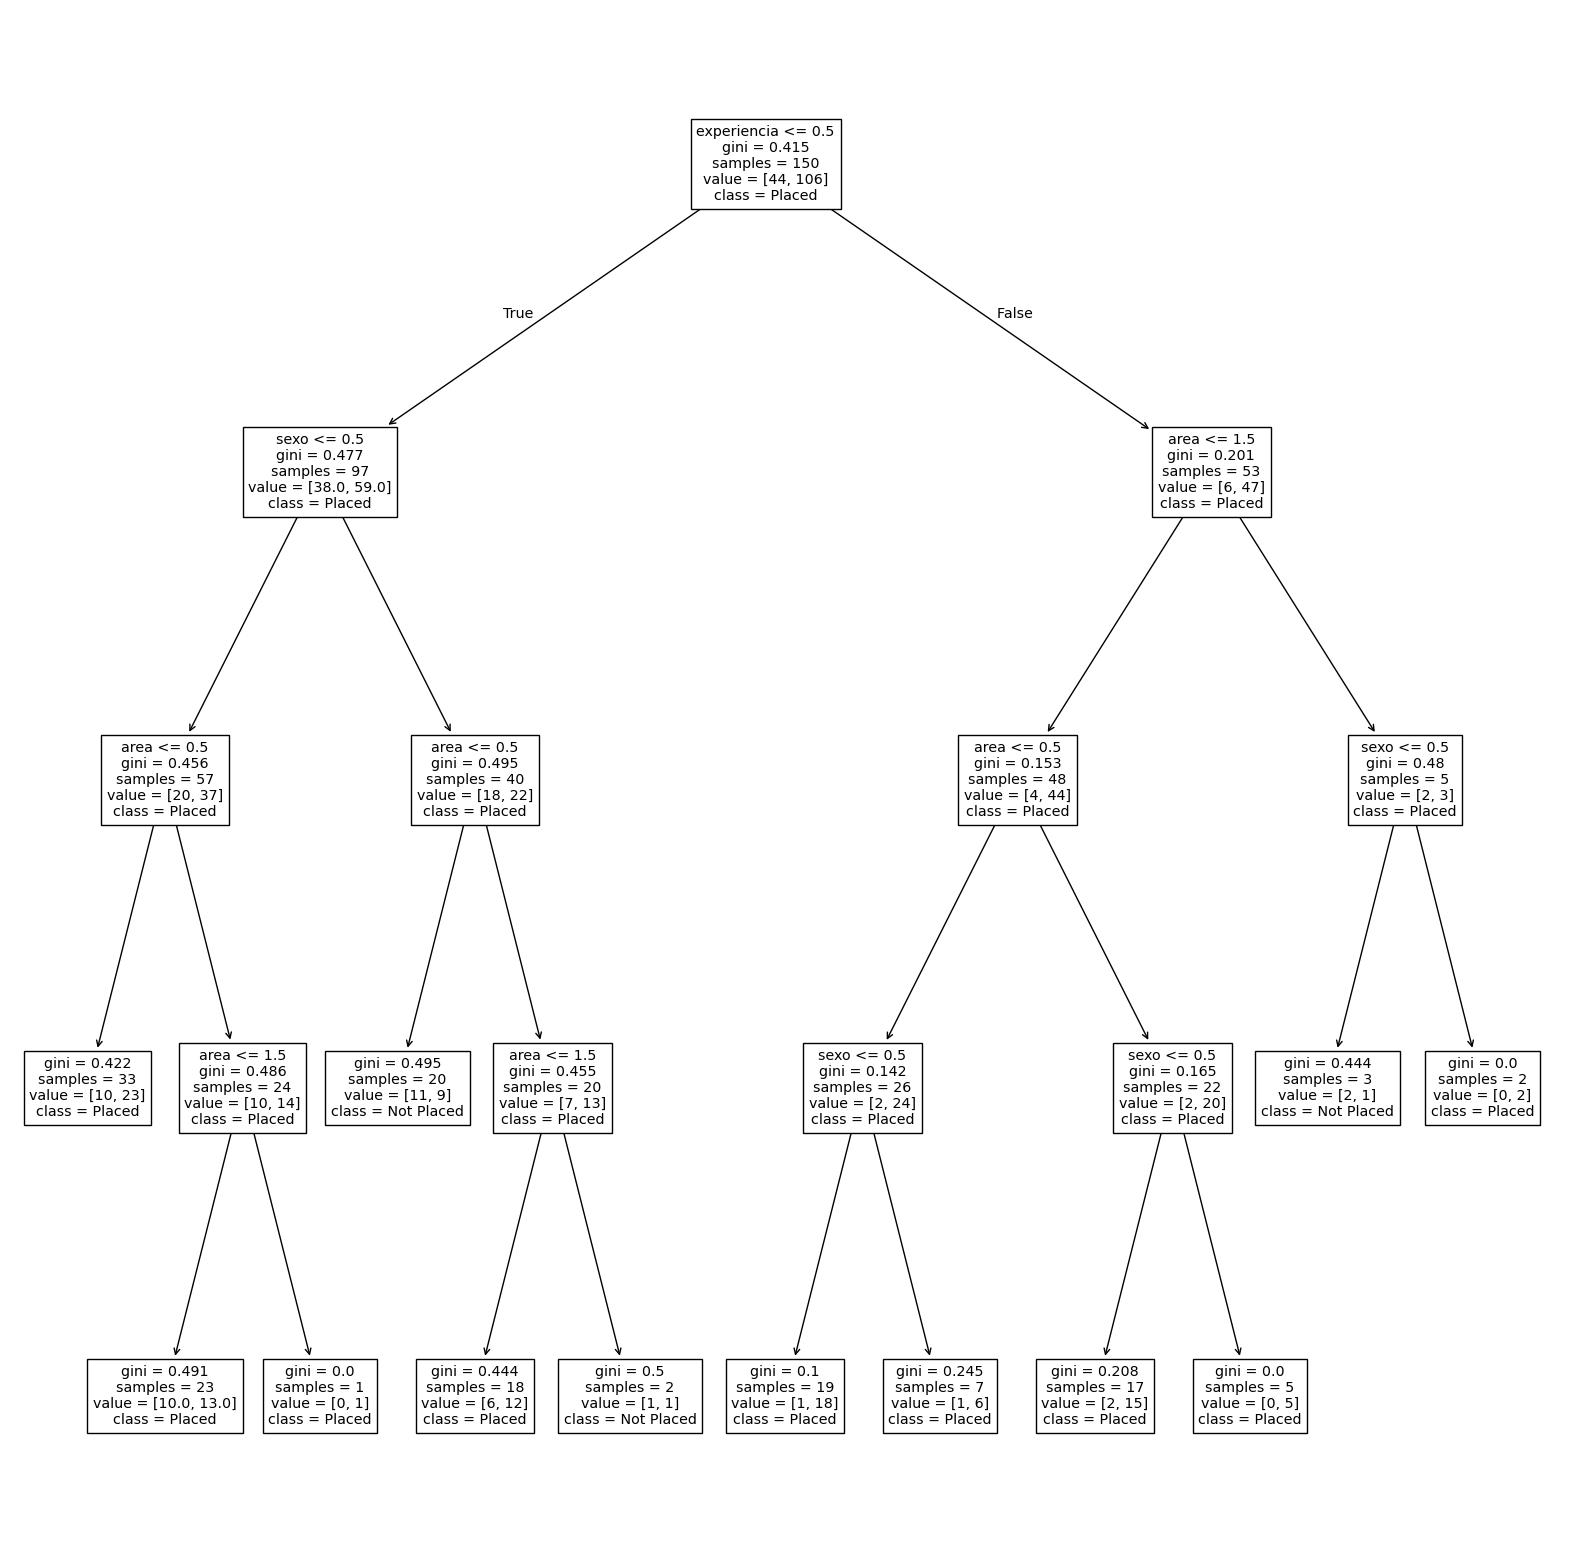

In [10]:
from sklearn import tree

features = list(x.columns)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
tree.plot_tree(arvore, feature_names=features, class_names=arvore.classes_)

In [11]:
df = pd.get_dummies(df, columns=['hsc_s'])
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,area,sexo,experiencia,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science
0,1,M,67.00,Others,91.00,Others,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,0,0,0,False,True,False
1,2,M,79.33,Central,78.33,Others,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,1,0,1,False,False,True
2,3,M,65.00,Central,68.00,Central,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,2,0,0,True,False,False
3,4,M,56.00,Central,52.00,Central,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,1,0,0,False,False,True
4,5,M,85.80,Central,73.60,Central,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,0,0,0,False,True,False


In [12]:
x = df[['hsc_s_Arts', 'hsc_s_Commerce', 'hsc_s_Science', 'sexo', 'experiencia']]
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=18)

[[ 4 19]
 [ 6 36]]
              precision    recall  f1-score   support

  Not Placed       0.40      0.17      0.24        23
      Placed       0.65      0.86      0.74        42

    accuracy                           0.62        65
   macro avg       0.53      0.52      0.49        65
weighted avg       0.56      0.62      0.57        65



[Text(0.5131578947368421, 0.9, 'experiencia <= 0.5\ngini = 0.415\nsamples = 150\nvalue = [44, 106]\nclass = Placed'),
 Text(0.2631578947368421, 0.7, 'sexo <= 0.5\ngini = 0.477\nsamples = 97\nvalue = [38.0, 59.0]\nclass = Placed'),
 Text(0.38815789473684215, 0.8, 'True  '),
 Text(0.15789473684210525, 0.5, 'hsc_s_Science <= 0.5\ngini = 0.456\nsamples = 57\nvalue = [20, 37]\nclass = Placed'),
 Text(0.10526315789473684, 0.3, 'hsc_s_Commerce <= 0.5\ngini = 0.415\nsamples = 34\nvalue = [10, 24]\nclass = Placed'),
 Text(0.05263157894736842, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Placed'),
 Text(0.15789473684210525, 0.1, 'gini = 0.422\nsamples = 33\nvalue = [10, 23]\nclass = Placed'),
 Text(0.21052631578947367, 0.3, 'gini = 0.491\nsamples = 23\nvalue = [10.0, 13.0]\nclass = Placed'),
 Text(0.3684210526315789, 0.5, 'hsc_s_Science <= 0.5\ngini = 0.495\nsamples = 40\nvalue = [18, 22]\nclass = Placed'),
 Text(0.3157894736842105, 0.3, 'hsc_s_Arts <= 0.5\ngini = 0.496\nsamples = 22\n

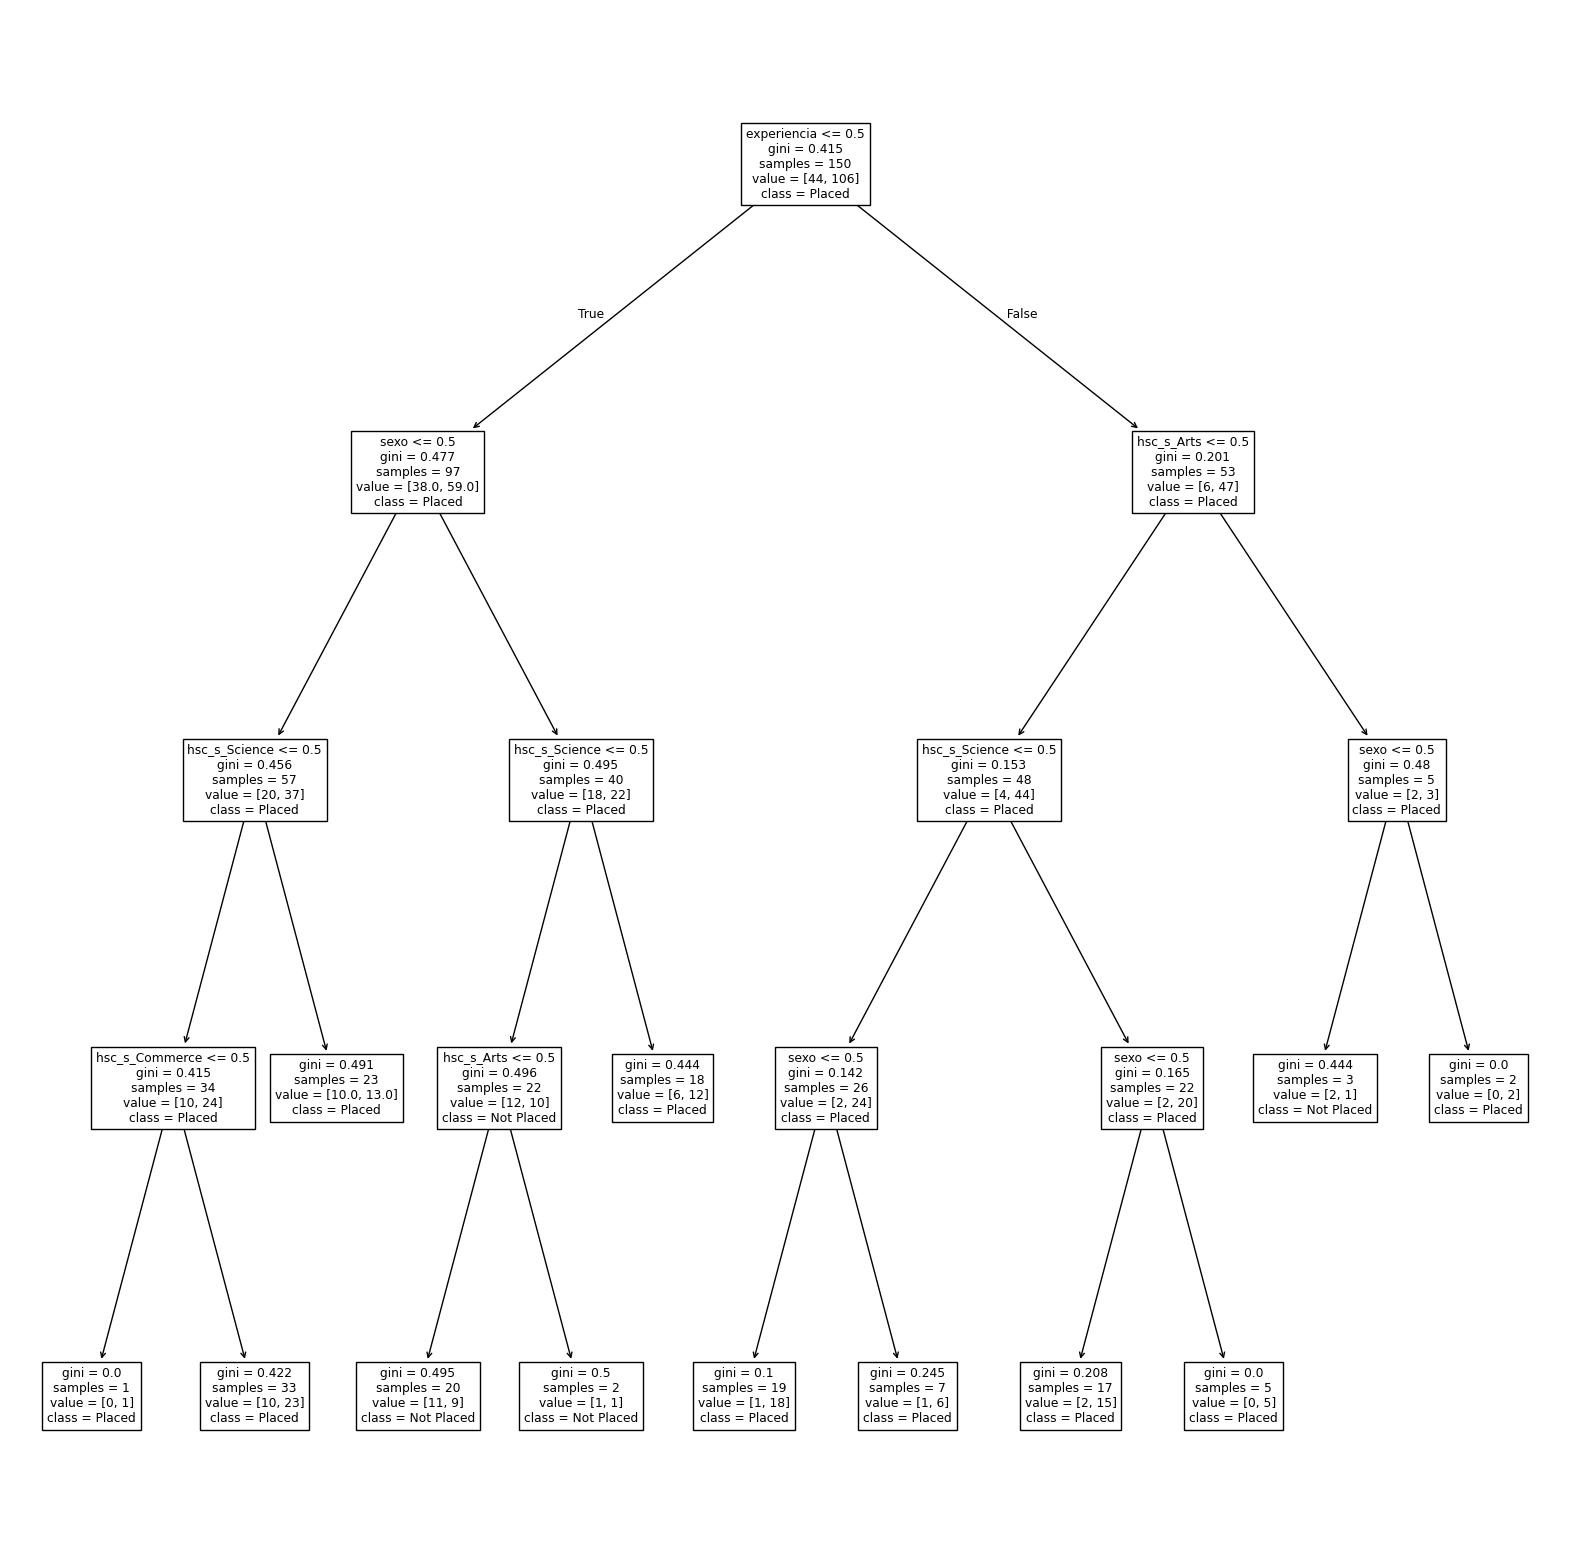

In [13]:
arvore = DecisionTreeClassifier()
arvore.fit(X_train,y_train)

predicao = arvore.predict(X_test)
print(confusion_matrix(y_test,predicao))
print(classification_report(y_test,predicao))

features = list(x.columns)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
tree.plot_tree(arvore, feature_names=features, class_names=arvore.classes_)